In [1]:
#Pretty Display of Variables
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#%autoreload

# Import libraries

In [3]:
from plot_projections import plot_all_projections, plot_final_projections, plot_point_for_couple
from prop_info import extreme_points, vect_blade, d_blade
from get_segments import blade_alone, get_segments_points, get_planes
from major_axis import get_major_axis
from projections import couple_all_planes, project_all_couples, projections_by_side, project_couple
from parameters import get_hub_points, get_hub_radius
from plot_param import plot_hub

In [4]:
import pandas as pd
import numpy as np

## Pre-processing

In [5]:
propeller_coords = pd.read_csv('aerostar_data.csv')
propeller_coords.shape

(151986, 3)

In [6]:
propeller_coords = propeller_coords.drop_duplicates(subset=None, keep='first', inplace=False)
propeller_coords = propeller_coords.reset_index(drop=True)

In [7]:
max_point, min_point, middle_point, highest_point, lowest_point = extreme_points(propeller_coords)

vect_length = vect_blade(max_point, min_point) 

dmiddle, dhighest, dlowest = d_blade(vect_length, middle_point, highest_point, lowest_point)

upper_blade, lower_blade = blade_alone(propeller_coords, vect_length, dmiddle)

vect_out, vect_side, hub_inner_radius = get_major_axis(propeller_coords, middle_point, vect_length)

## Projections

In [8]:
from myMathFunction import distance_point_plane, project_point, distance_p2p, point_on_plane

In [9]:
nb_seg = 3
planes = get_planes(upper_blade, dmiddle, dhighest, vect_length, nb_seg)

segments = get_segments_points(upper_blade, planes, nb_seg)

nb_point = 200
proj_up, proj_down, point_down, point_up = projections_by_side(nb_seg, planes, segments, nb_point)

C:\Users\Pauli\Desktop\PropellerProject\get_segments.py:51: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  segments["points"].append(blade.loc[index_segment].copy().as_matrix())


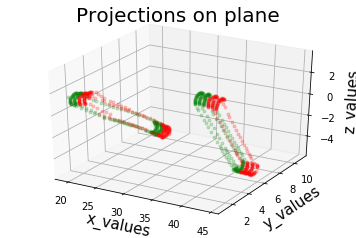

In [10]:
plot_point_for_couple(point_up, point_down)

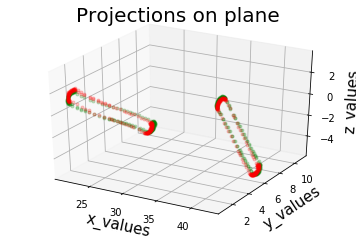

In [11]:
plot_all_projections(proj_up, proj_down)

In [12]:
down, up = couple_all_planes(proj_down, proj_up, nb_seg)

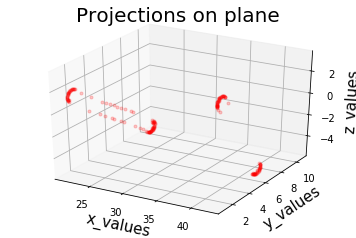

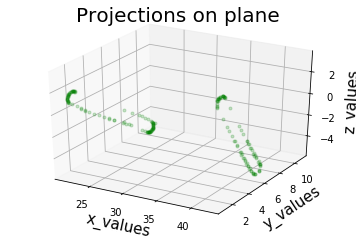

In [13]:
plot_point_for_couple(up, [])
plot_point_for_couple([], down)

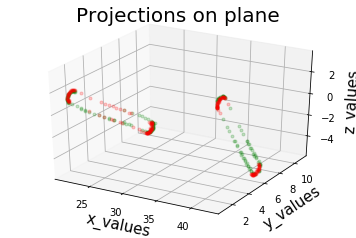

In [14]:
plot_point_for_couple(up, down)

In [15]:
def point_on_plane(x1, x2, plane):
    vec = x2 - x1
    #print("vec is {}".format(vec))
    
    t = - (plane[0]*x1[0] + plane[1]*x1[1] + plane[2]*x1[2] + plane[3]) / (plane[0]*vec[0] + plane[1]*vec[1] + plane[2]*vec[2])
    #t = - plane[3] / (plane[0]*vec[0] + plane[1]*vec[1] + plane[2]*vec[2])
    #print("t is {}".format(t))
    x = x1[0] + t*vec[0]
    y = x1[1] + t*vec[1]
    z = x1[2] + t*vec[2]
    #print(np.asarray([x, y, z]))
    
    return np.asarray([x, y, z])

In [16]:
def project_couple(plane, up, down): 
    projection = []
    for i in range(len(up)):
        projection.append( point_on_plane(up[i], down[i], plane) )
        
    return projection

def project_all_couples(planes, up, down):
    
    projections = []
    for i in range(len(up)):
        projections.append( project_couple(planes[i+1], up[i], down[i]) )
        
    projections_df = []
    labels = ['X', 'Y', 'Z']
    for i, plan in enumerate(projections):
        projections_df.append( pd.DataFrame(plan, columns = labels) )
        
    return projections_df

In [17]:
projections_df = project_all_couples(planes, up, down)

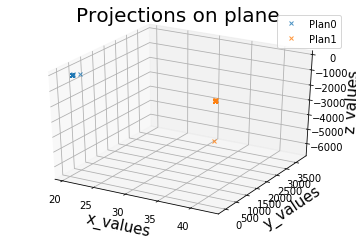

In [18]:
plot_final_projections(projections_df)

## Find parameters

    - Tip radius 
        Projection dans le sens de la longueur et ... ??
    - Blade twist 
        Project on planes as in projection
        Compute difference of angle between main directions of projections (PCA possible)

### Hub radius

In [31]:
hub_points = get_hub_points(propeller_coords, dmiddle, vect_length)

hub_outer_radius, hub_inner_radius = get_hub_radius(hub_points, middle_point, vect_side)

hub_radius = hub_outer_radius[2] - middle_point[2]  #from center to exterior radius

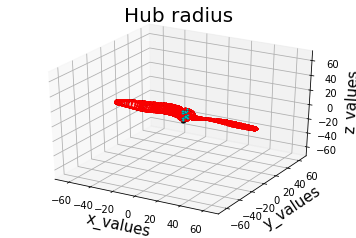

In [45]:
plot_hub(propeller_coords, hub_points, hub_outer_radius, hub_inner_radius)

### Chord length

In [60]:
chord_length = np.linalg.norm(highest_point - middle_point) - hub_radius
chord_length

56.333310137030246

### Blade twist